In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
train["linear_distance"] = np.sqrt((train.pickup_latitude**2 + train.pickup_longitude**2) - (train.dropoff_latitude**2 + train.dropoff_longitude**2))

c:\users\lycurgus orion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [5]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,linear_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.065430
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,NaN
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,NaN
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,NaN
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.638351


In [6]:
# https://www.movable-type.co.uk/scripts/latlong.html

### Using Haversine Formula for distance

In [7]:
o1 = train["pickup_latitude"]
o2 = train["dropoff_latitude"]
l1 = train["pickup_longitude"]
l2 = train["dropoff_longitude"]

In [8]:
do = o2 - o1
dl = l2 - l1

In [9]:
a = (np.sin(do/2)**2) + (np.cos(o1) * np.cos(o2) * np.sin(dl/2)**2)

In [10]:
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

In [11]:
train["gc_distance"] = (6371 * c) / 1000

In [12]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,linear_distance,gc_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.065430,0.060078
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,NaN,0.507241
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,NaN,0.086996
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,NaN,0.161422
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.638351,0.123950


In [13]:
train.drop("linear_distance", axis=1, inplace=True)

In [14]:
train = train[train["gc_distance"] > 0]

In [15]:
train.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            49989, 49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997,
            49998],
           dtype='int64', length=48551)

In [16]:
train[train["passenger_count"] == 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,gc_distance
314,2015-06-02 23:16:15.00000012,34.0,2015-06-02 23:16:15 UTC,-73.974899,40.751095,-73.908546,40.881878,0,0.934130
566,2012-01-28 21:33:18.0000002,4.9,2012-01-28 21:33:18 UTC,-73.955322,40.782840,-73.955797,40.773673,0,0.058481
678,2012-02-27 07:24:20.0000003,6.5,2012-02-27 07:24:20 UTC,-73.983397,40.738183,-73.971395,40.758023,0,0.147559
1160,2011-05-25 23:58:48.0000001,13.3,2011-05-25 23:58:48 UTC,-73.998360,40.740348,-73.946455,40.777348,0,0.405188
1935,2011-10-23 11:09:28.0000001,10.1,2011-10-23 11:09:28 UTC,-73.971400,40.795000,-73.967900,40.768600,0,0.169661
2200,2011-05-23 16:54:19.0000001,8.1,2011-05-23 16:54:19 UTC,-73.988008,40.748303,-74.005185,40.738733,0,0.124822
2425,2011-11-25 22:47:33.0000001,8.9,2011-11-25 22:47:33 UTC,-73.999900,40.738600,-73.971800,40.746300,0,0.184792
3034,2011-03-06 12:03:14.0000001,5.7,2011-03-06 12:03:14 UTC,-73.986557,40.745783,-73.994545,40.729995,0,0.112606
3413,2011-02-28 06:39:16.0000002,7.3,2011-02-28 06:39:16 UTC,-73.973413,40.743708,-73.985220,40.741583,0,0.076075
3481,2011-11-30 17:23:02.0000003,11.3,2011-11-30 17:23:02 UTC,-73.968100,40.762500,-73.984400,40.760900,0,0.104024


In [17]:
cols = ["fare_amount", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "gc_distance"]

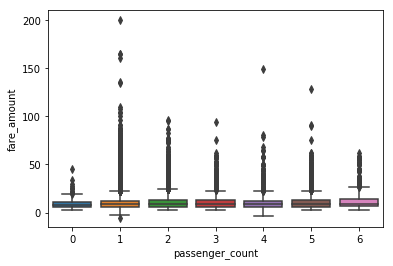

In [18]:
sns.boxplot(train["passenger_count"], train["fare_amount"])

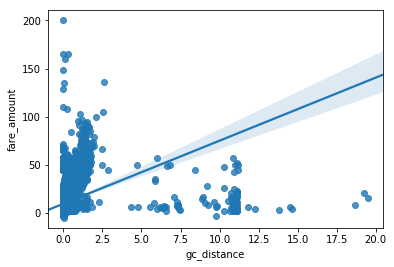

In [19]:
sns.regplot(x=train["gc_distance"], y=train["fare_amount"], data=train)

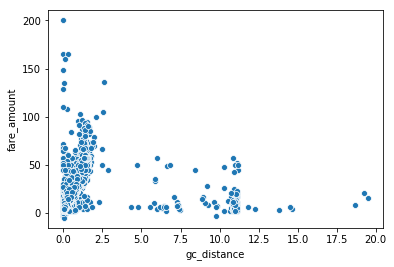

In [20]:
sns.scatterplot(x=train["gc_distance"], y=train["fare_amount"], data=train[cols])

In [21]:
X = train[cols]
y = train["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [22]:
classifier = Sequential()

In [23]:
X_train.shape

(38840, 7)

In [24]:
y_train.shape

(38840,)

In [25]:
classifier.add(Dense(7, init="normal", activation="relu", input_dim=7))
# classifier.add(Dropout(p=0.1))

c:\users\lycurgus orion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", input_dim=7, kernel_initializer="normal")`
  """Entry point for launching an IPython kernel.


In [26]:
classifier.add(Dense(7, init="normal", activation="relu"))
# classifier.add(Dropout(p=0.1))

c:\users\lycurgus orion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, activation="relu", kernel_initializer="normal")`
  """Entry point for launching an IPython kernel.


In [27]:
classifier.add(Dense(4, init="normal", activation="relu"))
# classifier.add(Dropout(p=0.1))

c:\users\lycurgus orion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="normal")`
  """Entry point for launching an IPython kernel.


In [28]:
classifier.add(Dense(1, init="normal", activation="softmax"))
# classifier.add(Dropout(p=0.1))

c:\users\lycurgus orion\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="softmax", kernel_initializer="normal")`
  """Entry point for launching an IPython kernel.


In [29]:
classifier.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [30]:
classifier.fit(X_train, y_train, batch_size=50, epochs=50)

Epoch 1/50
38840/38840 [==============================] - 2s 49us/step - loss: 199.3048 - acc: 0.0000e+00
Epoch 2/50
38840/38840 [==============================] - 1s 37us/step - loss: 199.3048 - acc: 0.0000e+00
Epoch 3/50
18700/38840 [=============>................] - ETA: 0s - loss: 200.0135 - acc: 0.0000e+00

KeyboardInterrupt: 